## Capstone Modeling

In [1]:
# Installing Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To "pickle" things, like accuracies or even an entire fitted model
import joblib

# To cross-validate
from sklearn.model_selection import cross_val_score

# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp

# To build a pipeline
from sklearn.pipeline import Pipeline

# To try scaling the data in various ways
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV

In [46]:
df = pd.read_csv('data/ready_for_modeling.csv')

Focusing only on the IMDB score column for now

In [47]:
X = df.drop(columns = ['imdb_score','imdb_votes'])
y = df['imdb_score']

In [48]:
y

0        8.2
1        7.7
2        8.2
3        7.7
4        7.7
        ... 
17042    8.4
17043    3.9
17044    4.0
17045    5.3
17046    8.4
Name: imdb_score, Length: 17047, dtype: float64

In [49]:
#Not using stratify=y as giving an error, plus this is a regression problem
#not a classification one

X_rem, X_test, y_rem, y_test = \
train_test_split(X, y, \
                 test_size=0.25, random_state=23)

Further splitting into train and validation.

In [50]:
X_train, X_val, y_train, y_val = \
train_test_split(X_rem, y_rem, \
                 test_size=0.2, random_state=23)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logreg = LogisticRegression(solver = 'lbfgs', max_iter=10000) 
#this is the default solver anyway, but specifying it here as it's asked int he question

# Fitting to the test data
logreg.fit(X_train,y_train)


# Scoring on train and test sets

print(f'Train Score: {logreg.score(X_train, y_train)}')
print(f'Test Score: {logreg.score(X_val, y_val)}')


ValueError: Unknown label type: 'continuous'

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_ss, y_train)
y_pred_knn = knn_model.predict(X_val_ss)
print("KNN Regression")
print("Mean Squared Error:", mean_squared_error(y_val, y_pred_knn))
print("R2 Score:", r2_score(y_val, y_pred_knn))
print()

KNN Regression
Mean Squared Error: 1.624487915526007
R2 Score: -0.03192056152066902



In [20]:
#Creating a function to get the Fibonacci sequence

def fibonacci(n):
   
    # If input is negative then it will print incorrect input
    if n < 0:
        print("Incorrect input")
 
    # If n is 0 then it will return 0
    elif n == 0:
        return 0
 
    # If n is 1,2 it will return 1 (the first 2 values of the sequence)
    elif n == 1 or n == 2:
        return 1
 
    else:
        return fibonacci(n-1) + fibonacci(n-2)
     

In [21]:
#Check to see if it works

fib_list = []
for i in np.arange(2,21,1): #starting from 2 as we want to being with 1,2....
    fib_list.append(fibonacci(i))
    
print (fib_list)

[1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


In [24]:
#Doing this for KNN

scaler = StandardScaler()
scaler.fit(X_train)

X_train_ss = scaler.transform(X_train)

X_val_ss = scaler.transform(X_val)

In [28]:
#Now creating the For loop to look at optimal values for the number of neighbours

train_acc=[]
val_acc=[]

for n in fib_list:
    
    print(f'Now running the KNN model with n={n}', end='\r')
    
    # Instantiate the KNN model 
    KNN_model= KNeighborsRegressor(n_neighbors = n)
    KNN_model.fit(X_train_ss, y_train)
    
    train_accuracy = KNN_model.score(X_train_ss, y_train)
    val_accuracy = KNN_model.score(X_val_ss, y_val)
    
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)

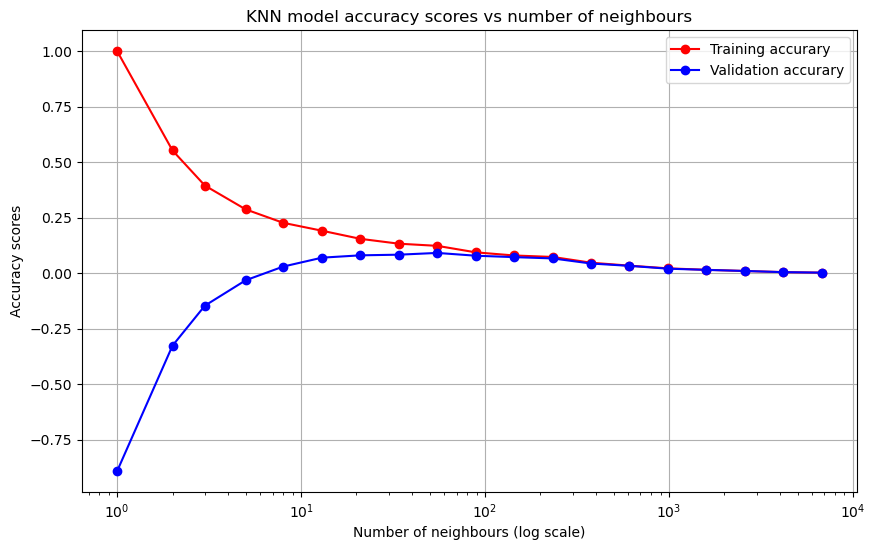

In [29]:
#Plotting this with a log scale for the X-axis for better interpretability

plt.figure(figsize=(10,6))
plt.plot(fib_list, train_acc, color='red', label = 'Training accurary', marker = 'o')
plt.plot(fib_list, val_acc, color='blue', label = 'Validation accurary', marker = 'o')
plt.xscale('log') #Using a log scale to better spread out the values
plt.xlabel('Number of neighbours (log scale)')
plt.ylabel('Accuracy scores')
plt.title('KNN model accuracy scores vs number of neighbours')
plt.legend()
plt.grid()
plt.show()

## Decision Trees

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
dt_baseline = DecisionTreeRegressor(random_state=42)
dt_baseline.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [38]:
print(f'The training accuracy is {round(dt_baseline.score(X_train, y_train)*100,2)}% \
and the validation accuracy is {round(dt_baseline.score(X_val, y_val)*100,2)}%')

The training accuracy is 100.0% and the test accuracy is 1.35%


In [42]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)
print("Decision Tree Regression")
print("Mean Squared Error:", mean_squared_error(y_val, y_pred_dt))
print("R2 Score:", r2_score(y_val, y_pred_dt))

Decision Tree Regression
Mean Squared Error: 1.5530308955807586
R2 Score: 0.013470953825025833


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lin = linear_model.predict(X_val)
print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_val, y_pred_lin))
print("R2 Score:", r2_score(y_val, y_pred_lin))
print()

Linear Regression
Mean Squared Error: 1.0984972319070514
R2 Score: 0.3022035623999215



In [45]:
linear_model = LinearRegression()
linear_model.fit(X_train_ss, y_train)
y_pred_lin = linear_model.predict(X_val_ss)
print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_val, y_pred_lin))
print("R2 Score:", r2_score(y_val, y_pred_lin))
print()

Linear Regression
Mean Squared Error: 1.098390474190223
R2 Score: 0.30227137791399405



In [51]:
from sklearn.model_selection import cross_val_score

In [57]:
# Linear Regression
linear_model = LinearRegression()
lin_scores = cross_val_score(linear_model, X_rem_ss, y_rem, cv=5, scoring='r2')
print("Linear Regression")
print("R2 Scores:", lin_scores)
print("Average R2 Score:", np.mean(lin_scores))
print()

Linear Regression
R2 Scores: [0.31236515 0.28670341 0.30099018 0.27837932 0.31221393]
Average R2 Score: 0.2981303960788738



In [53]:
# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_scores = cross_val_score(knn_model, X_rem, y_rem, cv=5, scoring='r2')
print("KNN Regression")
print("R2 Scores:", knn_scores)
print("Average R2 Score:", np.mean(knn_scores))
print()

KNN Regression
R2 Scores: [0.18935126 0.15242987 0.18748405 0.16743761 0.20064971]
Average R2 Score: 0.1794705007736734



In [54]:
#Doing this for KNN

scaler = StandardScaler()
scaler.fit(X_rem)

X_rem_ss = scaler.transform(X_rem)

In [56]:
# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_scores = cross_val_score(knn_model, X_rem_ss, y_rem, cv=5, scoring='r2')
print("KNN Regression")
print("R2 Scores:", knn_scores)
print("Average R2 Score:", np.mean(knn_scores))
print()

KNN Regression
R2 Scores: [-0.03483853 -0.06375581 -0.02363718 -0.05211699 -0.03713307]
Average R2 Score: -0.042296315967833606

